In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
train_df = pd.read_csv('train.csv')

In [12]:
train_df=train_df.drop('PassengerId',axis=1)

In [13]:
train_df = train_df.drop('Name',axis=1)

In [14]:
train_df['VIP'] = train_df['VIP']*1
# change VIP format to 1 0

In [15]:
train_df['CryoSleep']=train_df['CryoSleep']*1
# change CrySleep format to 1 0

In [16]:
train_df['Transported']=train_df['Transported']*1
# change Transported format to 1 0

In [20]:
homeplanet = pd.get_dummies(train_df['HomePlanet'],drop_first=True)

In [21]:
destination=pd.get_dummies(train_df['Destination'],drop_first=True)

In [22]:
train_df=pd.concat([homeplanet,destination,train_df],axis=1)

In [23]:
train_df=train_df.drop(['Destination','HomePlanet'],axis=1)

In [25]:
train_df.dropna(inplace=True)

In [26]:
from sklearn.model_selection import train_test_split

# Logistic regression

In [28]:
X = train_df.drop(['Cabin','Transported'],axis=1)
y = train_df['Transported']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()

In [32]:
logmodel.fit(X_train,y_train)

/Users/boqianli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
predictions = logmodel.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1048
           1       0.79      0.82      0.81      1078

    accuracy                           0.80      2126
   macro avg       0.80      0.80      0.80      2126
weighted avg       0.80      0.80      0.80      2126



In [36]:
confusion_matrix(y_test,predictions)

array([[817, 231],
       [191, 887]])

## We use the test data

In [223]:
test = pd.read_csv('test.csv')

In [114]:
test=test.drop(['Name'],axis=1)

In [115]:
test['VIP'] = test['VIP']*1
test['CryoSleep']=test['CryoSleep']*1

In [116]:
homeplanet_test = pd.get_dummies(test['HomePlanet'],drop_first=True)
destination_test=pd.get_dummies(test['Destination'],drop_first=True)
test=pd.concat([homeplanet_test,destination_test,test],axis=1)

## Let's deal with the NaN!!

#### fill CryoSleep

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

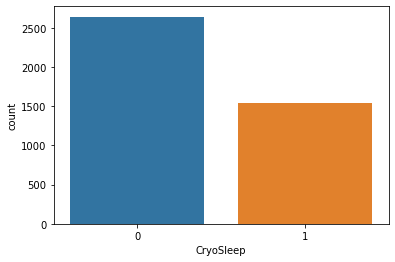

In [139]:
sns.countplot(x='CryoSleep',data=test)
# Here I choose 0 to fill the Cryosleep

In [141]:
test['CryoSleep'].isnull().value_counts()

False    4184
True       93
Name: CryoSleep, dtype: int64

In [143]:
test['CryoSleep']=test['CryoSleep'].fillna(0)

#### fill Age column 

<AxesSubplot:xlabel='Age', ylabel='count'>

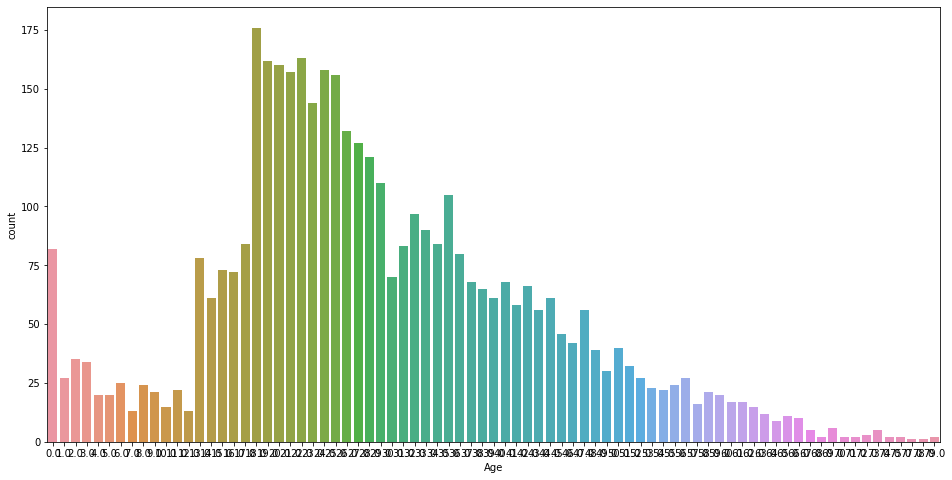

In [146]:
plt.figure(figsize=(16,8))
sns.countplot(x='Age',data=test)

In [147]:
test['Age'].mean()

28.65814620162446

In [148]:
test['Age'].median()

26.0

##### I choose 28 to fill the na of Age

In [149]:
test['Age']=test['Age'].fillna(28)

## VIP 

In [151]:
test['VIP'].value_counts()
# I choose 0 to fill the na 

0    4110
1      74
Name: VIP, dtype: int64

In [153]:
test['VIP']=test['VIP'].fillna(0)

## RoomService

In [156]:
test.corr()['RoomService']

Europa          -0.088517
Mars             0.270657
PSO J318.5-22   -0.056650
TRAPPIST-1e      0.057683
CryoSleep       -0.272184
Age              0.063207
VIP              0.066377
RoomService      1.000000
FoodCourt       -0.030233
ShoppingMall     0.064501
Spa              0.006342
VRDeck          -0.032827
Name: RoomService, dtype: float64

In [166]:
test['RoomService'].isnull().value_counts()

False    4195
True       82
Name: RoomService, dtype: int64

In [167]:
test['RoomService']=test['RoomService'].fillna(0)

## Foodcourt

In [171]:
test.corr()['FoodCourt']

Europa           0.357679
Mars            -0.133515
PSO J318.5-22   -0.054813
TRAPPIST-1e     -0.066143
CryoSleep       -0.216175
Age              0.107342
VIP              0.115075
RoomService     -0.030336
FoodCourt        1.000000
ShoppingMall     0.027809
Spa              0.244851
VRDeck           0.278152
Name: FoodCourt, dtype: float64

In [172]:
test['FoodCourt'].isnull().value_counts()

False    4171
True      106
Name: FoodCourt, dtype: int64

In [173]:
test['FoodCourt'].value_counts()

0.0        2690
1.0          59
2.0          30
4.0          22
3.0          21
           ... 
842.0         1
1624.0        1
20809.0       1
6564.0        1
2680.0        1
Name: FoodCourt, Length: 902, dtype: int64

In [174]:
test['FoodCourt']=test['FoodCourt'].fillna(1)

## Shopping Mall

In [177]:
test['ShoppingMall'].isnull().value_counts()

False    4179
True       98
Name: ShoppingMall, dtype: int64

In [178]:
test['ShoppingMall'].value_counts()

0.0       2744
1.0         72
3.0         35
2.0         32
4.0         24
          ... 
936.0        1
508.0        1
2183.0       1
2451.0       1
3851.0       1
Name: ShoppingMall, Length: 715, dtype: int64

In [179]:
test['ShoppingMall']=test['ShoppingMall'].fillna(0)

## Spa

In [183]:
test['Spa'].isnull().value_counts()

False    4176
True      101
Name: Spa, dtype: int64

In [182]:
test['Spa'].value_counts()

0.0       2611
1.0         72
2.0         43
3.0         29
4.0         27
          ... 
2882.0       1
2061.0       1
3745.0       1
3560.0       1
168.0        1
Name: Spa, Length: 833, dtype: int64

In [186]:
test['Spa']=test['Spa'].fillna(0)

# VR

In [188]:
test['VRDeck'].isnull().value_counts()

False    4197
True       80
Name: VRDeck, dtype: int64

In [189]:
test['VRDeck'].value_counts()

0.0       2757
1.0         72
2.0         38
3.0         33
7.0         23
          ... 
1004.0       1
1297.0       1
1397.0       1
2019.0       1
104.0        1
Name: VRDeck, Length: 796, dtype: int64

In [190]:
test['VRDeck']=test['VRDeck'].fillna(0)

In [193]:
test

,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,0,0,1,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,0,0,0,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,1,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,0,1,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,0,0,1,9266_02,1,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,0,0,0,1,9269_01,0,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,0,1,0,0,9271_01,1,28.0,0,0.0,0.0,0.0,0.0,0.0
4275,1,0,0,0,9273_01,0,28.0,0,0.0,2680.0,0.0,0.0,523.0


In [124]:
test=test.drop(['Destination','HomePlanet'],axis=1)

In [129]:
test=test.drop('Cabin',axis=1)

In [194]:
test_predictions=logmodel.predict(test.drop('PassengerId',axis=1))
test_predictions.astype(bool)

array([ True, False,  True, ...,  True,  True,  True])

In [195]:
passengerid = test['PassengerId'].tolist()
passengerid

['0013_01',
 '0018_01',
 '0019_01',
 '0021_01',
 '0023_01',
 '0027_01',
 '0029_01',
 '0032_01',
 '0032_02',
 '0033_01',
 '0037_01',
 '0040_01',
 '0040_02',
 '0042_01',
 '0046_01',
 '0046_02',
 '0046_03',
 '0047_01',
 '0047_02',
 '0047_03',
 '0048_01',
 '0049_01',
 '0054_01',
 '0054_02',
 '0054_03',
 '0055_01',
 '0057_01',
 '0059_01',
 '0060_01',
 '0063_01',
 '0065_01',
 '0075_01',
 '0079_01',
 '0080_01',
 '0083_01',
 '0087_01',
 '0089_01',
 '0093_01',
 '0094_01',
 '0094_02',
 '0095_01',
 '0096_01',
 '0100_01',
 '0100_02',
 '0104_01',
 '0106_01',
 '0109_01',
 '0117_01',
 '0118_01',
 '0121_01',
 '0124_01',
 '0125_01',
 '0125_02',
 '0130_01',
 '0131_01',
 '0132_01',
 '0135_01',
 '0137_01',
 '0142_01',
 '0142_02',
 '0142_03',
 '0143_01',
 '0145_01',
 '0150_01',
 '0150_02',
 '0153_01',
 '0154_01',
 '0155_01',
 '0156_01',
 '0157_01',
 '0158_01',
 '0158_02',
 '0159_01',
 '0161_01',
 '0162_01',
 '0166_01',
 '0168_01',
 '0175_01',
 '0175_02',
 '0175_03',
 '0175_04',
 '0175_05',
 '0176_01',
 '01

In [196]:
data = {
  "PassengerId": passengerid,
  "Transported": test_predictions
}
data

{'PassengerId': ['0013_01',
  '0018_01',
  '0019_01',
  '0021_01',
  '0023_01',
  '0027_01',
  '0029_01',
  '0032_01',
  '0032_02',
  '0033_01',
  '0037_01',
  '0040_01',
  '0040_02',
  '0042_01',
  '0046_01',
  '0046_02',
  '0046_03',
  '0047_01',
  '0047_02',
  '0047_03',
  '0048_01',
  '0049_01',
  '0054_01',
  '0054_02',
  '0054_03',
  '0055_01',
  '0057_01',
  '0059_01',
  '0060_01',
  '0063_01',
  '0065_01',
  '0075_01',
  '0079_01',
  '0080_01',
  '0083_01',
  '0087_01',
  '0089_01',
  '0093_01',
  '0094_01',
  '0094_02',
  '0095_01',
  '0096_01',
  '0100_01',
  '0100_02',
  '0104_01',
  '0106_01',
  '0109_01',
  '0117_01',
  '0118_01',
  '0121_01',
  '0124_01',
  '0125_01',
  '0125_02',
  '0130_01',
  '0131_01',
  '0132_01',
  '0135_01',
  '0137_01',
  '0142_01',
  '0142_02',
  '0142_03',
  '0143_01',
  '0145_01',
  '0150_01',
  '0150_02',
  '0153_01',
  '0154_01',
  '0155_01',
  '0156_01',
  '0157_01',
  '0158_01',
  '0158_02',
  '0159_01',
  '0161_01',
  '0162_01',
  '0166_01

In [217]:
submission1 = pd.DataFrame(submission1).set_index('PassengerId')
submission1

KeyError: "None of ['PassengerId'] are in the columns"

In [208]:
submission1['Transported']

PassengerId
0013_01    1
0018_01    0
0019_01    1
0021_01    1
0023_01    0
          ..
9266_02    1
9269_01    0
9271_01    1
9273_01    1
9277_01    1
Name: Transported, Length: 4277, dtype: int64

In [209]:
def convert_bool(int):
    if int == 1:
        return 'True'
    else:
        return 'False'

In [222]:
file_name = 'submission1.xlsx'
  
# saving the excel
submission1.to_csv(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [215]:
submission1['Transported'] = submission1['Transported'].apply(convert_bool)